# Problem 2: Finding the Optimal k Using Leave-One-Out Cross-Validation

In this task, you will use the **K-Nearest Neighbors (KNN)** classifier to classify handwritten digits from the MNIST dataset. The goal is to determine:
1. The optimal number of neighbors (k) for the KNN classifier.
2. Evaluate the classifier’s performance using leave-one-out cross-validation (LOO CV).

### Objectives
1. **Download and preprocess the MNIST dataset** (use 10% of the dataset for faster experimentation).
2. **Implement leave-one-out cross-validation** to evaluate the KNN classifier for various values of k.
3. **Determine the optimal value of k** based on LOO CV results.

### Steps to Follow:

1. **Preprocess the MNIST Dataset**:
   - Normalize the pixel values (e.g., divide by 255 to scale between 0 and 1).
   - Select a random 10% subset of the dataset.

2. **KNN Classifier**:
   - Use the `KNeighborsClassifier` from `sklearn.neighbors`.
   - Iterate over different values of k, specifically \( k = 1, 2, \dots, 10 \).

3. **Leave-One-Out Cross-Validation (LOO CV)**:
   - For each value of k, perform LOO CV:
     - Train the KNN model on \( n - 1 \) data points, where \( n \) is the total number of samples.
     - Test the model on the single data point left out.
     - Repeat this for all data points and compute the overall accuracy.

4. **Determine the Optimal k**:
   - Calculate the accuracy for each value of k.
   - Determine the value of k with the highest accuracy.

5. **Plot**:
   - Plot the accuracy for each value of k based on the LOO CV results.


In [12]:
import numpy as np
import keras
import sklearn

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# randomize data (but keep the label)
np.random.seed(101)
randomize = np.arange(len(x_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]

randomize = np.arange(len(x_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
y_test = y_test[randomize]

# trim, change shape to 28*28 and convert to [0, 1]
# x_train, _, y_train, _ = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.1, random_state=101)
# x_test, _, y_test, _ = sklearn.model_selection.train_test_split(x_test, y_test, test_size=0.1, random_state=101)

x_train = x_train[:6000]
y_train = y_train[:6000]

x_test = x_test[:1000]
y_test = y_test[:1000]

x_train = x_train.reshape((6000, 28*28))
x_train = x_train.astype("float32") / 255.

x_test = x_test.reshape((1000, 28*28))
x_test = x_test.astype("float32") / 255.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

def loocv_knn(x_train, y_train, parameters):
    parameter_accuracies = []

    # iterate over parameters to test
    for k in parameters:
        accuracies = []
        
        # loocv (could be optimized, by replacing deletes with indexed copying, but its python)
        for i in range(len(x_train)):
            # split data
            x_train_loo = np.delete(x_train, i, axis=0)
            y_train_loo = np.delete(y_train, i, axis=0)
            x_test_loo = [x_train[i]]
            y_test_loo = [y_train[i]]

            # fit model
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(x_train_loo, y_train_loo)

            # predict
            y_pred = model.predict(x_test_loo)

            # evaluate
            accuracies.append(accuracy_score(y_test_loo, y_pred))

        print("k = %d, accuracy = %.2f" % (k, np.mean(accuracies)))
        parameter_accuracies.append(np.mean(accuracies))
    
    par_max_idx = np.argmax(parameter_accuracies)
    return (parameters[par_max_idx], parameter_accuracies)

In [15]:
parameters = np.arange(1, 11)
best_k, accuracies = loocv_knn(x_train, y_train, parameters)
print("Best k: %d" % best_k)

k = 1, accuracy = 0.94
k = 2, accuracy = 0.92
k = 3, accuracy = 0.93
k = 4, accuracy = 0.93
k = 5, accuracy = 0.93
k = 6, accuracy = 0.93
k = 7, accuracy = 0.93
k = 8, accuracy = 0.93
k = 9, accuracy = 0.93
k = 10, accuracy = 0.93
Best k: 1


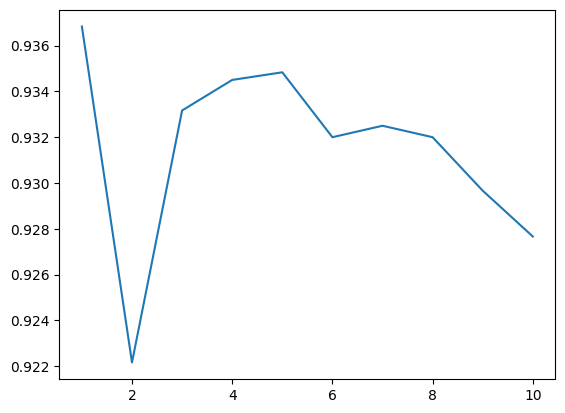

In [16]:
import matplotlib.pyplot as plt

plt.plot(parameters, accuracies)